

*   **HeartDiseaseorAttack**: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (1=Yes, 0=No)
*   **HighBP**: Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional (1=Yes, 0=No)
*   **HighChol**: Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (1=Yes, 0=No)
*   **CholCheck**: Cholesterol check within past five years (1=Yes, 0=No)
*   **BMI**: Body Mass Index
*   **Smoker**: Have you smoked at least 100 cigarettes in your entire life? (5 packs = 100 cigarettes) (1=Yes, 0=No)
*   **Stroke**: (Ever told) you had a stroke (1=Yes, 0=No)
*   **Diabetes**: (Ever told) you have diabetes (2=yes diabetes, 1=pre-diabetes or borderline diabetes, 0=no diabetes or only during pregnancy)
*   **PhysActivity**: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (1=Yes, 0=No)
*   **Fruits**: Consume Fruit 1 or more times per day (1=Yes, 0=No)
*   **Veggies**: Consume Vegetables 1 or more times per day (1=Yes, 0=No)
*   **HvyAlcoholConsump**: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) (1=Yes, 0=No)
*   **AnyHealthcare**: Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (1=Yes, 0=No)
*   **NoDocbcCost**: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (1=Yes, 0=No)
*   **GenHlth**: Would you say that in general your health is (1 is Excellent -> 5 is Poor)
*   **MentHlth**: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0-30)
*   **PhysHlth**: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30)
*   **DiffWalk**: Do you have serious difficulty walking or climbing stairs? (1=Yes, 0=No)
*   **Sex**: Indicate sex of respondent (1=Male, 0=Female)
*   **Age**: Fourteen-level age category (1=18-24, 2=25-29, 3=30-34, 4=35-39, 5=40-44, 6=45-49, 7=50-54, 8=55-59, 9=60-64, 10=65-69, 11=70-74, 12=75-79, 13=80 and older)
*   **Education**: What is the highest grade or year of school you completed? (1=never attended school or kindergarten only up to 6=college 4 years or more)
*   **Income**: Is your annual household income from all sources (1=less than 10,000 usd all the way up to 8=75,000 usd or more)




















https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import seaborn as sns

# 1. Data loading

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving heart_disease_health_indicators_BRFSS2015.csv to heart_disease_health_indicators_BRFSS2015.csv


In [ ]:
df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


# 2. Data Cleaning

Checking null value in the dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

# 3. Data Preprocessing

**3.1 Sampling Instance**

random sampling to randomly select only 10,000 data for this project becuase the orginal dataset is too large and we don't have enough resource to train the whole samples

In [ ]:
rand_samples = df.sample(10000)

**3.2 Imbalance data**

In [ ]:
# Check class distribution for positive and negative cases
rand_samples.groupby(['HeartDiseaseorAttack']).size()

HeartDiseaseorAttack
0.0    9075
1.0     925
dtype: int64

There are imbalance problem in the dataset, where it number above display a large gap between number of two different cases. This may affect the prediction of model from bias over the overnumber outcome. Therefore, we apply SMOTE which is a oversample technique to balance between number of positive and negative cases.

In [ ]:
# Define X and y
X = rand_samples.drop(columns='HeartDiseaseorAttack')
y = rand_samples['HeartDiseaseorAttack']

In [ ]:
# Perform SMOTE over sampling technique to boost number of positive outcome. Therefore, data will be evenly distributed between positive and negative outcome.
oversample = SMOTE(random_state=42)
X, y = oversample.fit_resample(X, y)
Counter(y)

Counter({0.0: 9075, 1.0: 9075})

**3.3 Feature Selection**

According to large number of features in the dataset, some could be irrelevant to the prediction result. We perform feature selection technique: SelectKBest to select only 10 most relevant features to be used to train and test the model

Text(0.5, 1.0, 'Feature Ranking by F-score')

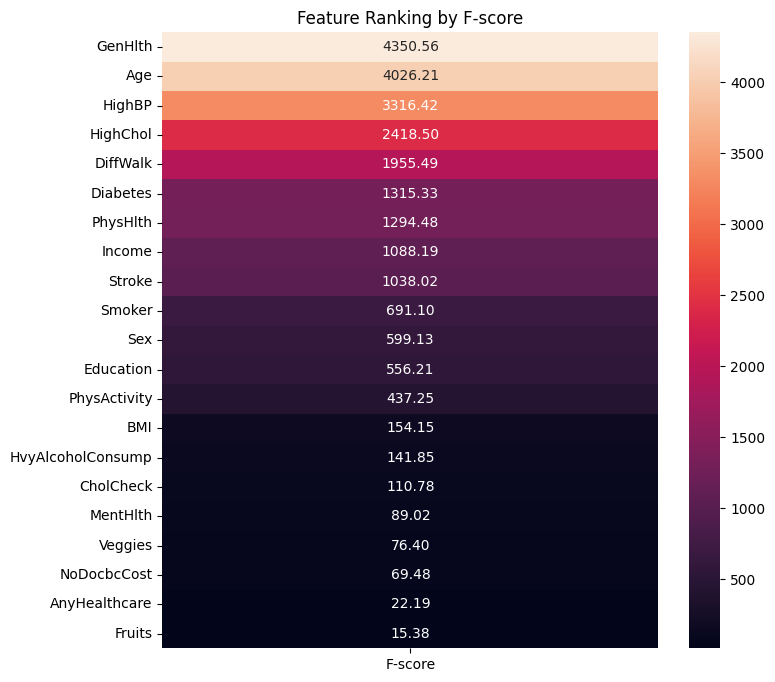

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)
fit = selector.fit(X,y)

featureScores = pd.DataFrame(data = fit.scores_,index = list(X.columns),columns = ['F-score'])
plt.subplots(figsize = (8,8))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'F-score'), annot = True, fmt = '.2f')
plt.title('Feature Ranking by F-score')

In [ ]:
X_selected = selector.fit_transform(X, y)
selected_indices = selector.get_support(indices=True)
selected_feature = X.columns[selected_indices]
X_selected = pd.DataFrame(X_selected, columns=selected_feature)
X_selected

,HighBP,HighChol,Smoker,Stroke,Diabetes,GenHlth,PhysHlth,DiffWalk,Age,Income
0,1.000000,1.000000,1.000000,0.000000,0.0,2.000000,0.000000,0.000000,8.000000,6.0
1,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,0.000000,0.000000,6.000000,5.0
2,1.000000,0.000000,0.000000,0.000000,2.0,3.000000,0.000000,1.000000,8.000000,7.0
3,0.000000,0.000000,0.000000,0.000000,1.0,2.000000,0.000000,0.000000,10.000000,8.0
4,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,7.000000,8.0
...,...,...,...,...,...,...,...,...,...,...
18145,1.000000,1.000000,0.000000,0.000000,0.0,2.000000,0.000000,0.000000,10.648219,8.0
18146,0.000000,0.000000,0.000000,0.607496,0.0,3.214991,0.000000,0.607496,11.607496,8.0
18147,0.105717,0.894283,0.105717,0.000000,0.0,2.000000,0.000000,0.000000,10.105717,6.0
18148,1.000000,0.846756,0.000000,0.000000,0.0,4.000000,0.000000,1.000000,13.000000,6.0


**3.4 Scaling**

StandardScaler to scale these values

In [ ]:
scaler = StandardScaler()
X_selected = scaler.fit_transform(X_selected)

**Train-Test split**

In [ ]:
#split data into train and test set by 70-30 ratio and with random state
X_train, X_test, y_train, y_test = train_test_split(X_selected,y, test_size=0.3, random_state=1)

# 6. Model Architecture

**6.1 Classifier**

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Logistic Regression
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train, y_train)
y_test_pred_lr = logistic_reg.predict(X_test)
acc_lr = accuracy_score(y_test_pred_lr, y_test)
print("Accuracy: {:.4%}".format(acc_lr))

Accuracy: 78.3471%


In [ ]:
from sklearn import svm

# Support Vector Machine
supportvector = svm.SVC()
supportvector.fit(X_train,y_train)
y_test_pred_svm = supportvector.predict(X_test)
acc_svm = accuracy_score(y_test_pred_svm, y_test)
print("Accuracy: {:.4%}".format(acc_svm))

Accuracy: 87.9339%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#KNN
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_test_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test_pred_knn, y_test)
print("Accuracy: {:.4%}".format(acc_knn))

Accuracy: 88.3012%


In [ ]:
from sklearn.naive_bayes import GaussianNB

#naive bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_test_pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(y_test_pred_nb, y_test)
print("Accuracy: {:.4%}".format(acc_nb))

Accuracy: 74.6373%


In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_test_pred_dt = decision_tree.predict(X_test)
acc_dt = accuracy_score(y_test_pred_dt, y_test)
print("Accuracy: {:.4%}".format(acc_dt))

Accuracy: 91.8641%


**6.2 Ensemble Classifier**

6.2.1 Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

#AdaBoost
adaboost = AdaBoostClassifier()
adaboost.fit(X_train,y_train)
y_test_pred_ada = adaboost.predict(X_test)
acc_ada = accuracy_score(y_test_pred_ada, y_test)
print("Accuracy: {:.4%}".format(acc_ada))

Accuracy: 91.4050%


In [ ]:
from xgboost import XGBClassifier

#XGBoost
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_test_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test_pred_xgb, y_test)
print("Accuracy: {:.4%}".format(acc_xgb))

Accuracy: 93.9578%


6.2.2 Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

#Bagging
bagging = BaggingClassifier()
bagging.fit(X_train,y_train)
y_test_pred_bagging = bagging.predict(X_test)
acc_bagging = accuracy_score(y_test_pred_bagging, y_test)
print("Accuracy: {:.4%}".format(acc_bagging))

Accuracy: 93.0028%


6.2.3 Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier

#Stacking
estimators=[]
estimators.append(('logistic_reg',logistic_reg))
estimators.append(('decision_tree',decision_tree))
estimators.append(('supportvector',supportvector))

stacking = StackingClassifier(estimators=estimators, final_estimator=decision_tree) #need more research to ref the final estimator
stacking.fit(X_train,y_train)
y_test_pred_stacking = stacking.predict(X_test)
acc_stacking = accuracy_score(y_test_pred_stacking, y_test)
print("Accuracy: {:.4%}".format(acc_stacking))

Accuracy: 88.7971%


From this point we can see that the ensemble learning model outperfrom others individual classifier

**6.3 Deep Learning**

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
        ])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11777 (46.00 KB)
Trainable params: 11777 (46.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=100)
y_pred_deep = model.predict(X_test)
y_pred_deep_binary = (y_pred_deep > 0.5).astype(int)
acc_deep = accuracy_score(y_pred_deep_binary,y_test)
print("Accuracy: {:.4%}".format(acc_deep))

Epoch 1/100
398/398 [==============================] - 2s 3ms/step - loss: 0.4731 - accuracy: 0.7780
Epoch 2/100
398/398 [==============================] - 1s 3ms/step - loss: 0.4282 - accuracy: 0.8054
Epoch 3/100
398/398 [==============================] - 1s 3ms/step - loss: 0.3793 - accuracy: 0.8333
Epoch 4/100
398/398 [==============================] - 1s 3ms/step - loss: 0.3374 - accuracy: 0.8520
Epoch 5/100
398/398 [==============================] - 1s 3ms/step - loss: 0.3038 - accuracy: 0.8673
Epoch 6/100
398/398 [==============================] - 1s 2ms/step - loss: 0.2892 - accuracy: 0.8718
Epoch 7/100
398/398 [==============================] - 1s 2ms/step - loss: 0.2773 - accuracy: 0.8807
Epoch 8/100
398/398 [==============================] - 1s 3ms/step - loss: 0.2622 - accuracy: 0.8811
Epoch 9/100
398/398 [==============================] - 1s 2ms/step - loss: 0.2598 - accuracy: 0.8871
Epoch 10/100
398/398 [==============================] - 1s 2ms/step - loss: 0.2556 - accura

Try to various optimizers

In [ ]:
#convert to np --> ensure consistency
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

optimizers = [
    ("Adam", tf.keras.optimizers.Adam(learning_rate=0.001)),
    ("SGD", tf.keras.optimizers.SGD(learning_rate=0.01)),
    ("RMSprop", tf.keras.optimizers.RMSprop(learning_rate=0.001)),
    ("Adagrad", tf.keras.optimizers.Adagrad(learning_rate=0.01)),
]

results = []

for optimizer_name, optimizer in optimizers:

  model_op = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
        ])

  model_op.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  model_op.fit(X_train_np, y_train_np, epochs=100)
  y_pred_deep_op = model_op.predict(X_test_np)
  y_pred_deep_binary_op = (y_pred_deep_op > 0.5).astype(int)
  acc_deep_op = accuracy_score(y_pred_deep_binary_op,y_test_np)*100
  results.append((optimizer_name, acc_deep_op))

for name, accuracy in results:
    print(f"{name} Accuracy Score: {accuracy:.2f}")

Epoch 1/100
398/398 [==============================] - 3s 3ms/step - loss: 0.5345 - accuracy: 0.7388
Epoch 2/100
398/398 [==============================] - 1s 3ms/step - loss: 0.4864 - accuracy: 0.7735
Epoch 3/100
398/398 [==============================] - 2s 4ms/step - loss: 0.4749 - accuracy: 0.7811
Epoch 4/100
398/398 [==============================] - 2s 4ms/step - loss: 0.4599 - accuracy: 0.7843
Epoch 5/100
398/398 [==============================] - 1s 3ms/step - loss: 0.4471 - accuracy: 0.7943
Epoch 6/100
398/398 [==============================] - 1s 3ms/step - loss: 0.4364 - accuracy: 0.8009
Epoch 7/100
398/398 [==============================] - 1s 4ms/step - loss: 0.4297 - accuracy: 0.8022
Epoch 8/100
398/398 [==============================] - 1s 3ms/step - loss: 0.4187 - accuracy: 0.8109
Epoch 9/100
398/398 [==============================] - 1s 3ms/step - loss: 0.4063 - accuracy: 0.8183
Epoch 10/100
398/398 [==============================] - 1s 3ms/step - loss: 0.4031 - accura

From this code, we can assess the accuracy of various classifiers in a deep learning model. This involves evaluating the performance of different optimizers on a dataset. The optimizers under consideration are as follows:

Optimizers:

*   Adam
*   SGD
*   RMSprop
*   Adagrad

For each optimizer, a neural network model is constructed with several dense layers, including batch normalization and dropout for regularization. The model is then trained with the specified optimizer, and its accuracy is evaluated on the test dataset. This process is repeated for each optimizer in the list, and the results are recorded.

However, according to the above result, the ensemble model tends to give more accurate results in predicting heart attack cases (at this point, we will focus only accuracy of the model). This could be caused by the complexity of the deep learning model on structured data. Therefore, ***we will shift the focus into the implementation and optimization of the ensemble model***.

# 7. Proposed Model

**7.1 Final estimator Comparison**

Ensemble model optimization: According to part6.2, ensemble learning, we select **XGBoost** and **Bagging** to make a comparison for the final estimator of proposed model due to their outstanding performace.

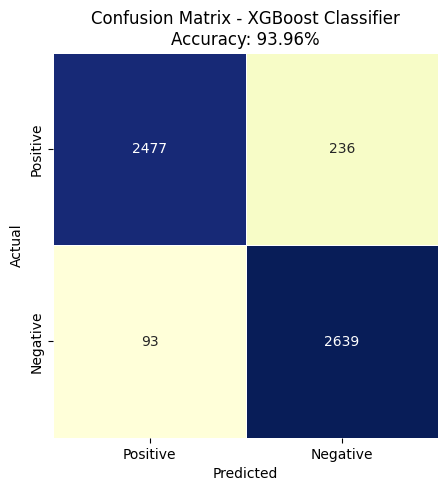

In [ ]:
# Confusion matrix: XGBoost
conf_matrix_xgb = confusion_matrix(y_test, y_test_pred_xgb, labels=[1, 0])

TP = conf_matrix_xgb[0, 0]
FP = conf_matrix_xgb[0, 1]
FN = conf_matrix_xgb[1, 0]
TN = conf_matrix_xgb[1, 1]

accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)

plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, cbar=False, square=True,
            xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - XGBoost Classifier\nAccuracy: {acc_xgb:.2%}')
plt.show()

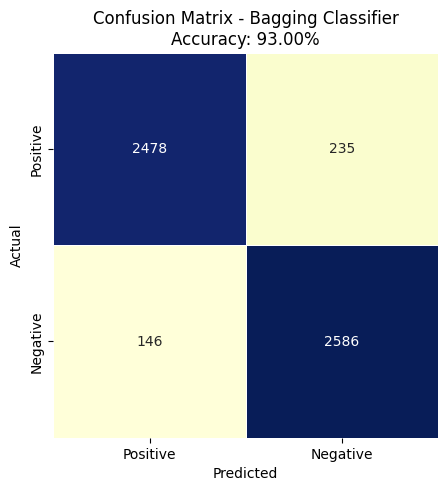

In [ ]:
# Confusion matrix: Bagging
conf_matrix_bagging = confusion_matrix(y_test, y_test_pred_bagging, labels=[1, 0])

TP = conf_matrix_bagging[0, 0]
FP = conf_matrix_bagging[0, 1]
FN = conf_matrix_bagging[1, 0]
TN = conf_matrix_bagging[1, 1]

accuracy_bagging = accuracy_score(y_test, y_test_pred_bagging)

plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_bagging, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, cbar=False, square=True,
            xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - Bagging Classifier\nAccuracy: {acc_bagging:.2%}')
plt.show()

From confusino matrix, it displays that even though the accuracy of both XGBoost and Bagging is around 94%, however, Bagging is false calculate the negative outcome (false positive) more than XGBoost did. Therefore, for this study, **we will select the XGBoost as our final estimator in further analysis.**

**7.2 Hyperparameter tuning: RandomSearch**

In [ ]:
# For XGBoost Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_xgb = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5),
    'reg_lambda': uniform(0, 1),
    'reg_alpha': uniform(0, 1),
}
#note: base learner is decision tree

xgb_classifier = XGBClassifier()

#RandomSeach
random_search_xgb = RandomizedSearchCV(
    xgb_classifier, param_distributions=param_xgb, n_iter=100,
    scoring='accuracy', n_jobs=-1, cv=5, verbose=1, random_state=0
)
random_search_xgb.fit(X_train, y_train)
print("Best Hyperparameters:", random_search_xgb.best_params_)

# Evaluate the best model on the test set
best_xgb_model = random_search_xgb.best_estimator_
accuracy_xgb = best_xgb_model.score(X_test, y_test)
print(f"Test Accuracy: {accuracy_xgb:.2f}")
print("Best score: ", random_search_xgb.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'colsample_bytree': 0.6080873589761303, 'gamma': 0.416309922773969, 'learning_rate': 0.24344702528495515, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 149, 'reg_alpha': 0.7991585642167236, 'reg_lambda': 0.46147936225293185, 'subsample': 0.9122116705145822}
Test Accuracy: 0.95
Best score:  0.9430932703659977


In [ ]:
# For bagging Hyperparameter tuning

param_bagging = {
    'n_estimators': randint(10, 100),
    'max_samples': uniform(0.5, 0.5),
    'max_features': uniform(0.5, 0.5),
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

bagging_classifier = BaggingClassifier()

#RandomSeach
random_search_bagging = RandomizedSearchCV(
    bagging_classifier, param_distributions=param_bagging, n_iter=100,
    scoring='accuracy', n_jobs=-1, cv=5, verbose=1, random_state=0
)
random_search_bagging.fit(X_train, y_train)
print("Best Hyperparameters:", random_search_bagging.best_params_)

# Evaluate the best model on the test set
best_bagging_model = random_search_bagging.best_estimator_
accuracy_bagging = best_bagging_model.score(X_test, y_test)
print(f"Test Accuracy: {accuracy_bagging:.2f}")
print("Best score: ", random_search_bagging.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'bootstrap': False, 'bootstrap_features': True, 'max_features': 0.7268484222780227, 'max_samples': 0.7682896055543611, 'n_estimators': 91}
Test Accuracy: 0.95
Best score:  0.9438803620621801


In [ ]:
# For AdaBoost Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_ada = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.3),
}
#note: base learner is decision tree

ada_classifier = AdaBoostClassifier()

#RandomSeach
random_search_ada = RandomizedSearchCV(
    ada_classifier, param_distributions=param_ada, n_iter=100,
    scoring='accuracy', n_jobs=-1, cv=5, verbose=1, random_state=0
)
random_search_ada.fit(X_train, y_train)
print("Best Hyperparameters:", random_search_ada.best_params_)

# Evaluate the best model on the test set
best_ada_model = random_search_ada.best_estimator_
accuracy_ada = best_ada_model.score(X_test, y_test)
print(f"Test Accuracy: {accuracy_ada:.2f}")
print("Best score: ", random_search_ada.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'learning_rate': 0.30302832645710115, 'n_estimators': 199}
Test Accuracy: 0.91
Best score:  0.9072018890200709


In [ ]:
# For Decision Tree Hyperparameter tuning

param_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'class_weight': [None, 'balanced'],
}

decisiontree_classifier = DecisionTreeClassifier()

#RandomSeach
random_search_dt = RandomizedSearchCV(
    decisiontree_classifier, param_distributions=param_dt, n_iter=100,
    scoring='accuracy', n_jobs=-1, cv=5, verbose=1, random_state=0
)
random_search_dt.fit(X_train, y_train)
print("Best Hyperparameters:", random_search_dt.best_params_)

# Evaluate the best model on the test set
best_dt_model = random_search_dt.best_estimator_
accuracy_dt = best_dt_model.score(X_test, y_test)
print(f"Test Accuracy: {accuracy_dt:.2f}")
print("Best score: ", random_search_dt.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 9, 'max_features': None, 'min_samples_leaf': 9, 'min_samples_split': 4, 'splitter': 'best'}
Test Accuracy: 0.89
Best score:  0.8899645808736718


**7.3 Proposed Model: optimized Stacking with tuned XGBoost, Bagging, AdaBoost, and Decision tree as base learner (Final estimator = XGBoost)**

In [ ]:
# 1st base learner: Tuned XGBoost
xbg_best_hyperparameters = {
    'colsample_bytree': 0.8994654479402189,
    'gamma': 0.4518598698729667,
    'learning_rate': 0.035026730632605564,
    'max_depth': 9,
    'min_child_weight': 1,
    'n_estimators': 174,
    'reg_alpha': 0.20915702948084114,
    'reg_lambda': 0.2869150433006046,
    'subsample': 0.8709053221353708
}
xgb_tuned = XGBClassifier()
xgb_tuned.set_params(**xbg_best_hyperparameters)
#xgb_tuned.fit(X_train,y_train)

# 2nd base learner: Tuned Bagging
bagging_best_hyperparameters = {
    'bootstrap': False,
    'bootstrap_features': True,
    'max_features': 0.7840222805469661,
    'max_samples': 0.9627983191463305,
    'n_estimators': 87
}
bagging_tuned = BaggingClassifier()
bagging_tuned.set_params(**bagging_best_hyperparameters)
#bagging_tuned.fit(X_train,y_train)

# 3rd base learner: Tuned AdaBoost
ada_best_hyperparameters = {
    'learning_rate': 0.30302832645710115,
    'n_estimators': 199
}
ada_tuned = AdaBoostClassifier()
ada_tuned.set_params(**ada_best_hyperparameters)
#ada_tuned.fit(X_train,y_train)

#4nd base learner: Tuned Decision tree
dt_best_hyperparameters = {
    'class_weight': 'balanced',
    'criterion': 'gini',
    'max_depth': 9,
    'max_features': None,
    'min_samples_leaf': 6,
    'min_samples_split': 10,
    'splitter': 'best'
}
dt_tuned = DecisionTreeClassifier()
dt_tuned.set_params(**dt_best_hyperparameters)
#dt_tuned.fit(X_train,y_train)

#Base Classifier
estimators = [
    ('xgb', xgb_tuned),
    ('ada', ada_tuned),
    ('bagging', bagging_tuned),
    ('dt', dt_tuned)
]

#StackingClassifier
proposed_stack = StackingClassifier(estimators=estimators,final_estimator = xgb_tuned)
proposed_stack.fit(X_train,y_train)
proposed_pred = proposed_stack.predict(X_test)
proposed_acc = accuracy_score(proposed_pred, y_test)
print("Accuracy: {:.4%}".format(proposed_acc))

Accuracy: 94.6740%


# 8. Evaluation

In [ ]:
proposed_pred_train = proposed_stack.predict(X_train)
print("Training Results\n")
print(classification_report(y_train, proposed_pred_train))

Training Results

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      6343
         1.0       1.00      0.94      0.96      6362

    accuracy                           0.97     12705
   macro avg       0.97      0.97      0.97     12705
weighted avg       0.97      0.97      0.97     12705



In [ ]:
print("Testing Results\n")
print(classification_report(y_test, proposed_pred))

Testing Results

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      2732
         1.0       0.98      0.91      0.94      2713

    accuracy                           0.95      5445
   macro avg       0.95      0.95      0.95      5445
weighted avg       0.95      0.95      0.95      5445



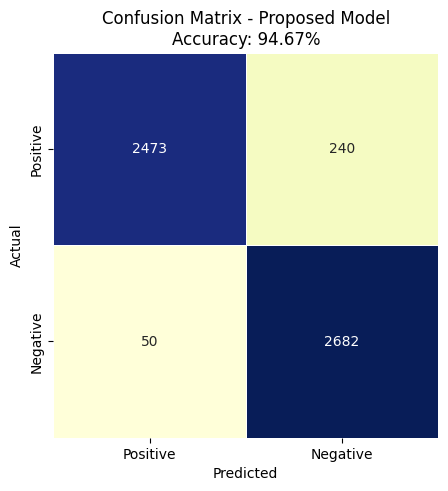

In [ ]:
# Confusion matrix: Proposed Model
conf_matrix_proposed = confusion_matrix(y_test, proposed_pred, labels=[1, 0])

TP = conf_matrix_proposed[0, 0]
FP = conf_matrix_proposed[0, 1]
FN = conf_matrix_proposed[1, 0]
TN = conf_matrix_proposed[1, 1]

plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_proposed, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, cbar=False, square=True,
            xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - Proposed Model\nAccuracy: {proposed_acc:.2%}')
plt.show()

False negative is obviously decreased if compared to an esemble model before tuning

**Prediction**

In [ ]:
from IPython.display import clear_output

#drop the 10,000 data point that we used for train-test the model
#randomly select only 10 data point to test in this prediction process
other_samples = df.drop(rand_samples.index).sample(10)

# Our model take only 10 features intputs; hence, we will select only related features
predict_X = other_samples[selected_feature]
predict_y = other_samples['HeartDiseaseorAttack']

predict_X.reset_index(drop=True, inplace=True)

predictions=[]
predictions = (proposed_stack.predict(predict_X) > 0.5).astype(int)
clear_output()

#print prediction
for i in range(10):
    print('%s \t=> %d (expected %d)' % (predict_X.iloc[i].tolist(), predictions[i], predict_y.iloc[i]))

[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 3.0, 4.0] 	=> 1 (expected 0)
[0.0, 0.0, 1.0, 0.0, 0.0, 3.0, 2.0, 0.0, 4.0, 6.0] 	=> 1 (expected 0)
[0.0, 1.0, 1.0, 0.0, 0.0, 3.0, 0.0, 0.0, 9.0, 6.0] 	=> 1 (expected 1)
[0.0, 1.0, 1.0, 0.0, 2.0, 3.0, 2.0, 0.0, 11.0, 8.0] 	=> 1 (expected 1)
[1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 30.0, 1.0, 10.0, 8.0] 	=> 1 (expected 0)
[1.0, 1.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 9.0, 8.0] 	=> 1 (expected 1)
[1.0, 1.0, 1.0, 0.0, 2.0, 5.0, 10.0, 1.0, 10.0, 3.0] 	=> 1 (expected 0)
[1.0, 1.0, 1.0, 0.0, 2.0, 2.0, 30.0, 1.0, 11.0, 2.0] 	=> 1 (expected 1)
[1.0, 1.0, 0.0, 0.0, 2.0, 3.0, 0.0, 0.0, 9.0, 6.0] 	=> 1 (expected 0)
[0.0, 0.0, 1.0, 0.0, 0.0, 3.0, 0.0, 0.0, 11.0, 8.0] 	=> 1 (expected 0)


In summary, from prediction result, it is shown that the proposed model is bias over the positive outcome (heart attack cases). This could haapen during the train-test split process. In this case, we randomly selected only 10,000 data points from above 200,000 data points in the original dataset to train and test the model. Due to limited resources, it is not possible to evaluate the model on every data points we have, and it could effect the model bias when we feed the data in training process. As result, at this step, when we randomly select other 10 data points in the rest of the orginal dataset, the bias towards positive outcome can be obviously shown in this such small test result.